# Lab9
Develop an LSTM model using any dataset, ensuring that all results are displayed in appropriate graphs.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta, datetime
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error


In [6]:
df_BRK = yf.Ticker("BRK-A").history(period="4y")
print(df_BRK.head())

                               Open      High       Low     Close  Volume  \
Date                                                                        
2020-04-20 00:00:00-04:00  282200.0  283800.0  281000.0  282800.0     700   
2020-04-21 00:00:00-04:00  275950.0  278610.0  275000.0  275750.0     700   
2020-04-22 00:00:00-04:00  280000.0  280888.0  278000.0  279660.0     700   
2020-04-23 00:00:00-04:00  280000.0  280888.0  277268.0  278750.0     600   
2020-04-24 00:00:00-04:00  280100.0  280130.0  276602.0  279460.0     500   

                           Dividends  Stock Splits  
Date                                                
2020-04-20 00:00:00-04:00        0.0           0.0  
2020-04-21 00:00:00-04:00        0.0           0.0  
2020-04-22 00:00:00-04:00        0.0           0.0  
2020-04-23 00:00:00-04:00        0.0           0.0  
2020-04-24 00:00:00-04:00        0.0           0.0  


In [7]:
df = pd.DataFrame(df_BRK)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-20 00:00:00-04:00,282200.0,283800.0,281000.0,282800.0,700,0.0,0.0
2020-04-21 00:00:00-04:00,275950.0,278610.0,275000.0,275750.0,700,0.0,0.0
2020-04-22 00:00:00-04:00,280000.0,280888.0,278000.0,279660.0,700,0.0,0.0
2020-04-23 00:00:00-04:00,280000.0,280888.0,277268.0,278750.0,600,0.0,0.0
2020-04-24 00:00:00-04:00,280100.0,280130.0,276602.0,279460.0,500,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-12 00:00:00-04:00,613407.0,615652.0,608000.0,608091.0,13700,0.0,0.0
2024-04-15 00:00:00-04:00,613163.0,618112.0,604300.0,604500.0,17100,0.0,0.0
2024-04-16 00:00:00-04:00,606513.0,610199.0,598160.0,598160.0,12800,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2020-04-20 00:00:00-04:00 to 2024-04-18 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1007 non-null   float64
 1   High          1007 non-null   float64
 2   Low           1007 non-null   float64
 3   Close         1007 non-null   float64
 4   Volume        1007 non-null   int64  
 5   Dividends     1007 non-null   float64
 6   Stock Splits  1007 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 62.9 KB


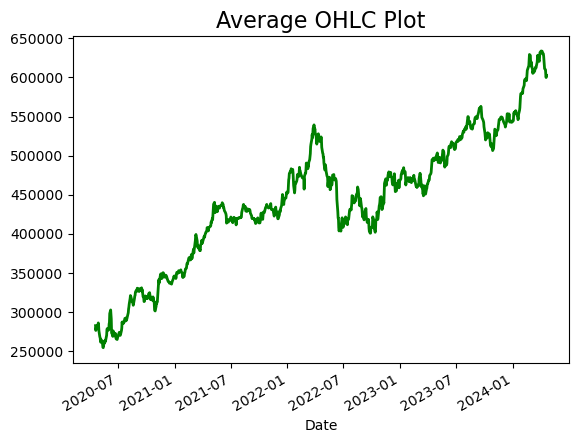

In [9]:
# Assuming OHLC_avg is already defined
OHLC_avg = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)
OHLC_avg.plot(color='green', linewidth=2)
plt.title('Average OHLC Plot', fontsize=16)
plt.show()

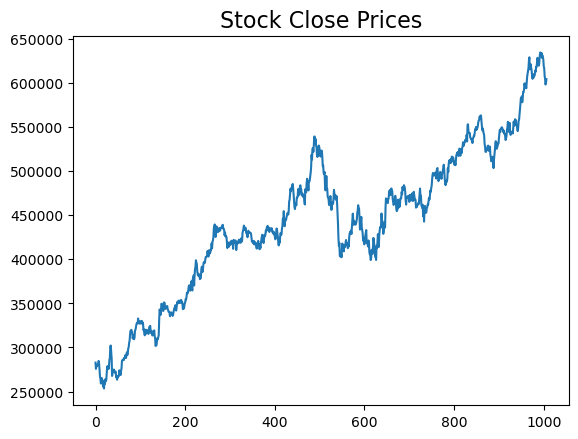

In [10]:
df2 = df.reset_index()['Close']
plt.title('Stock Close Prices', fontsize=16)
plt.plot(df2)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(1007, 1)

In [17]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [18]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [19]:
# calling the create dataset function to split the data into
# input output datasets with time step 200
time_step = 200
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(453, 200)
[[0.07691258 0.05840568 0.06866979 ... 0.23783073 0.2432778  0.25384642]
 [0.05840568 0.06866979 0.06628095 ... 0.2432778  0.25384642 0.25515896]
 [0.06866979 0.06628095 0.06814477 ... 0.25384642 0.25515896 0.26581421]
 ...
 [0.56781794 0.57143795 0.59326821 ... 0.53594933 0.56582812 0.55940452]
 [0.57143795 0.59326821 0.57498707 ... 0.56582812 0.55940452 0.5636913 ]
 [0.59326821 0.57498707 0.57716065 ... 0.55940452 0.5636913  0.55656942]]
(152, 200)
(152,)


In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

/home/arj/anaconda3/envs/clg/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 50,batch_size = 32,verbose = 2)

Epoch 1/50
15/15 - 8s - 541ms/step - loss: 9.9756e-04 - val_loss: 9.7660e-04
Epoch 2/50
15/15 - 9s - 587ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 3/50
15/15 - 7s - 458ms/step - loss: 9.8417e-04 - val_loss: 8.6754e-04
Epoch 4/50
15/15 - 7s - 469ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 5/50
15/15 - 8s - 557ms/step - loss: 8.4184e-04 - val_loss: 0.0027
Epoch 6/50
15/15 - 10s - 649ms/step - loss: 9.0330e-04 - val_loss: 0.0018
Epoch 7/50
15/15 - 9s - 623ms/step - loss: 9.2603e-04 - val_loss: 0.0050
Epoch 8/50
15/15 - 8s - 541ms/step - loss: 9.7980e-04 - val_loss: 0.0019
Epoch 9/50
15/15 - 12s - 786ms/step - loss: 8.3081e-04 - val_loss: 0.0014
Epoch 10/50
15/15 - 9s - 633ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 11/50
15/15 - 10s - 641ms/step - loss: 7.6878e-04 - val_loss: 0.0023
Epoch 12/50
15/15 - 8s - 521ms/step - loss: 8.0367e-04 - val_loss: 9.0449e-04
Epoch 13/50
15/15 - 8s - 510ms/step - loss: 9.2905e-04 - val_loss: 0.0030
Epoch 14/50
15/15 - 4s - 298ms/step - loss: 

In [1]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

NameError: name 'model' is not defined

In [27]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
look_back = 200

In [29]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [30]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
print("Shapes - testPredictPlot:", testPredictPlot.shape, "test_predict:", test_predict.shape)
testPredictPlot[len(train_predict) + (look_back) * 2 + 1 : len(df2) - 1, :] = test_predict

Shapes - testPredictPlot: (1007, 1) test_predict: (152, 1)


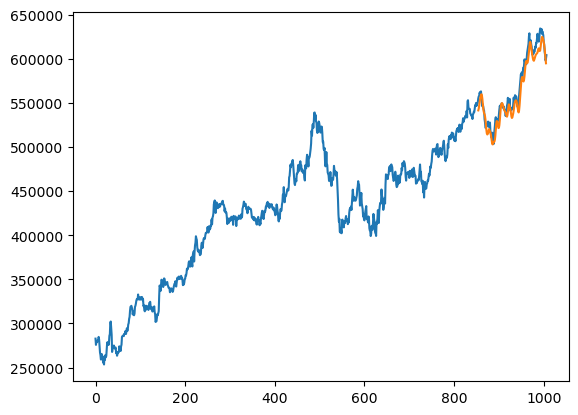

In [31]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(testPredictPlot)
plt.show()

In [32]:
model.save('/home/arj/TriSem3/Deep-learning/Lab/Lab 9/Predict_BRKA_lstm.h5')

In [33]:
# converting categorical variables in y_train to numerical variables
Y_test_E = pd.get_dummies(Y_test).values
print('Shape of Label tensor: ', Y_test_E.shape)

Shape of Label tensor:  (152, 152)


In [34]:
from keras.models import load_model

model = load_model('/home/arj/TriSem3/Deep-learning/Lab/Lab 9/Predict_BRKA_lstm.h5')
scores = model.evaluate(X_test, Y_test_E)
print(type(scores))
LSTM_accuracy = scores * 100
print('Test accuracy: ',round(LSTM_accuracy), '%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.5923
<class 'float'>
Test accuracy:  67 %
